# Practical Exercise with MNIST Example

In [1]:
import torch
import torch.nn

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from mnist_classification.data_loader import load_mnist

from mnist_classification.models.fc_model import FullyConnectedClassifier
from mnist_classification.models.cnn_model import ConvolutionalClassifier
from mnist_classification.models.rnn_model import SequenceClassifier

In [3]:
model_fn = "./model.pth"

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['config'], d['model']

In [6]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28,28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict:", float(torch.argmax(y_hat[i], dim=-1)))

In [7]:
def test(model, x, y, to_be_shown=True):
    model.eval()
    
    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))
        
        accuracy = correct_cnt / total_cnt
        print("Accuracy: %.4f" % accuracy)
        
        if to_be_shown:
            plot(x, y_hat)

In [8]:
from train import get_model

train_config, state_dict = load(model_fn, device)

model = get_model(train_config).to(device)
model.load_state_dict(state_dict)

print(model)

SequenceClassifier(
  (rnn): LSTM(28, 64, num_layers=4, batch_first=True, dropout=0.2, bidirectional=True)
  (layers): Sequential(
    (0): ReLU()
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Linear(in_features=128, out_features=28, bias=True)
    (3): Softmax(dim=-1)
  )
)


Accuracy: 1.0000


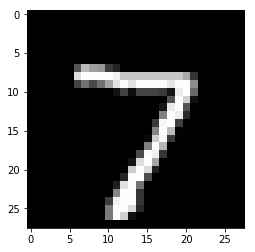

Predict: 7.0


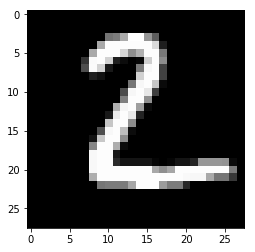

Predict: 2.0


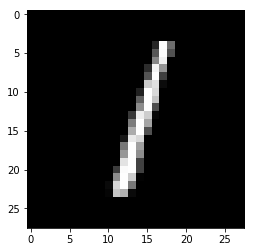

Predict: 1.0


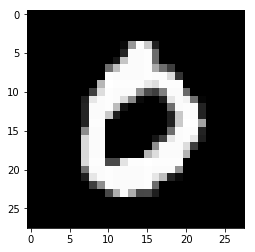

Predict: 0.0


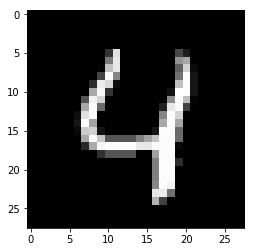

Predict: 4.0


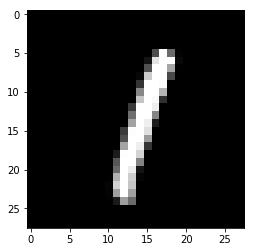

Predict: 1.0


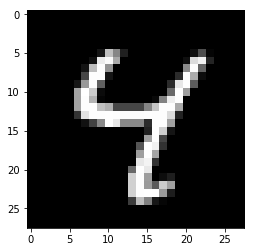

Predict: 4.0


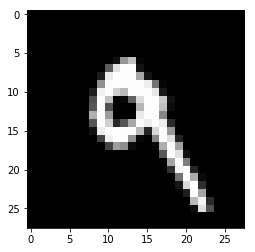

Predict: 9.0


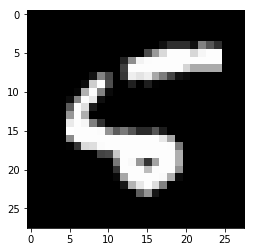

Predict: 5.0


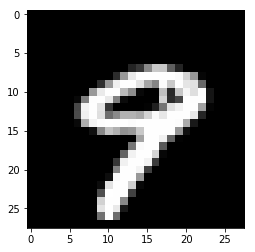

Predict: 9.0


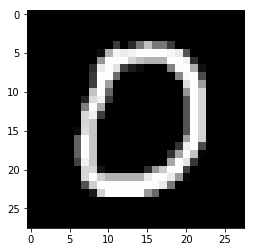

Predict: 0.0


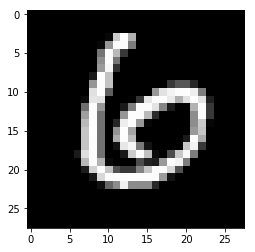

Predict: 6.0


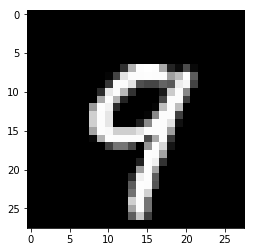

Predict: 9.0


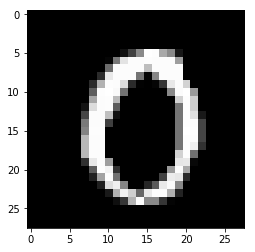

Predict: 0.0


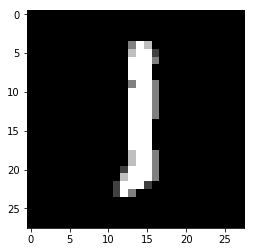

Predict: 1.0


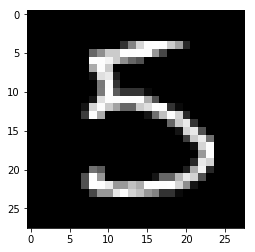

Predict: 5.0


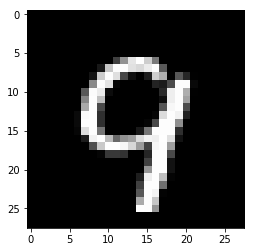

Predict: 9.0


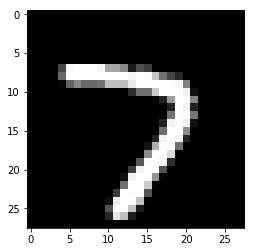

Predict: 7.0


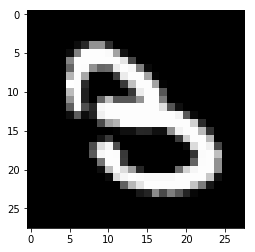

Predict: 3.0


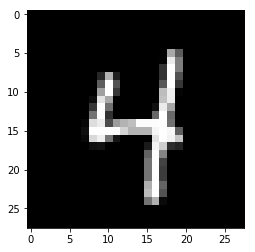

Predict: 4.0


In [9]:
# Load MNIST test set.
x, y = load_mnist(is_train=False,
                  flatten=True if train_config.model == 'fc' else False)

x, y = x.to(device), y.to(device)

test(model, x[:20], y[:20], to_be_shown=True)